,ray1,ray2,ray3,ray4,ray5,kartx,karty,kartz,time,action
0,-1.000000,6.520963,4.611085,6.489805,4.588916,15.98892,0.264488,3.105164,0.100632,ACCELERATE
1,-1.000000,6.520926,4.611081,6.489840,4.588920,15.98892,0.273206,3.105036,0.208055,ACCELERATE
2,-1.000000,6.520916,4.611076,6.489851,4.588925,15.98892,0.275302,3.105015,0.311390,ACCELERATE
3,-1.000000,6.520908,4.611072,6.489858,4.588930,15.98893,0.275676,3.105012,0.401621,ACCELERATE
4,-1.000000,6.520902,4.611067,6.489865,4.588934,15.98893,0.275743,3.105016,0.500187,ACCELERATE
...,...,...,...,...,...,...,...,...,...,...
1416,0.928427,0.835753,1.547613,2.534083,-1.000000,14.98860,0.296702,52.120530,46.001270,ACCELERATE
1417,0.925835,0.842288,1.556550,2.542170,-1.000000,14.44852,0.295907,52.790040,46.100030,ACCELERATE
1418,0.923708,0.840380,1.557029,2.545754,-1.000000,13.86868,0.295823,53.455730,46.200100,ACCELERATE
1419,0.921134,0.836330,1.560062,2.510900,-1.000000,13.24070,0.296903,54.118750,46.302360,ACCELERATE


C:\Users\Javier\AppData\Local\Temp\ipykernel_19112\2407033595.py:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  positionThroughTime.scatter(subset['kartx'], subset['kartz'], subset['time'], c=color, label=action)


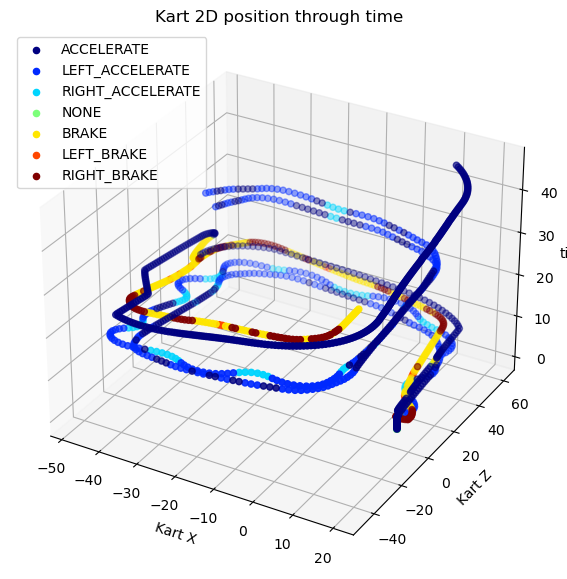

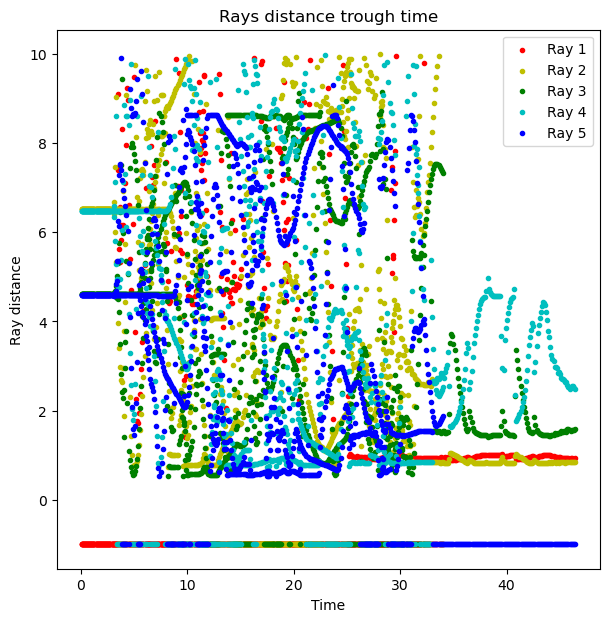

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Colormaps https://matplotlib.org/stable/users/explain/colors/colormaps.html#references

#Nota: para calcular la precision del modelo vamos a redondear la salida, pues nos
#interesa saber que el modelo gira a la derecha, no que esta 95% seguro de girar a la derecha

#Ejercicio 2
kartData = pd.DataFrame()

numberOfFiles = 4;
for i in range(numberOfFiles):
    newKartData = pd.read_csv(f'AAKart/ML/Kart{i:02d}.csv')
    
    kartData = pd.concat([kartData, newKartData], axis=0, ignore_index=True)

display(kartData)

#Tabla posicion 2D a traves del tiempo
figure = plt.figure(figsize=(15, 7))
positionThroughTime = figure.add_subplot(111, projection='3d')

#Pintar separando por acciones y pintandolas de colores diferentes
unique_actions = kartData['action'].unique()
colors = plt.cm.jet(np.linspace(0, 1, len(unique_actions)))

for action, color in zip(unique_actions, colors):
    subset = kartData[kartData['action'] == action]
    positionThroughTime.scatter(subset['kartx'], subset['kartz'], subset['time'], c=color, label=action)
    
positionThroughTime.set_xlabel('Kart X')
positionThroughTime.set_ylabel('Kart Z')
positionThroughTime.set_zlabel('time')
positionThroughTime.legend()
positionThroughTime.set_title('Kart 2D position through time')
plt.show()

#Distancia de los rayos a traves del tiempo
plt.figure(figsize=(7, 7))
plt.scatter(kartData['time'], kartData['ray1'], c='r', marker='.', label="Ray 1")
plt.scatter(kartData['time'], kartData['ray2'], c='y', marker='.', label="Ray 2")
plt.scatter(kartData['time'], kartData['ray3'], c='g', marker='.', label="Ray 3")
plt.scatter(kartData['time'], kartData['ray4'], c='c', marker='.', label="Ray 4")
plt.scatter(kartData['time'], kartData['ray5'], c='b', marker='.', label="Ray 5")
plt.xlabel('Time')
plt.ylabel('Ray distance')
plt.legend()
plt.title('Rays distance trough time')
plt.show()

,ray1,ray2,ray3,ray4,ray5,kartx,kartz,action
0,1.000000,0.624499,0.458187,0.622511,0.431888,15.98892,3.105164,ACCELERATE
1,1.000000,0.624495,0.458186,0.622515,0.431888,15.98892,3.105036,ACCELERATE
2,1.000000,0.624494,0.458186,0.622516,0.431889,15.98892,3.105015,ACCELERATE
3,1.000000,0.624493,0.458185,0.622517,0.431889,15.98893,3.105012,ACCELERATE
4,1.000000,0.624492,0.458185,0.622518,0.431890,15.98893,3.105016,ACCELERATE
...,...,...,...,...,...,...,...,...
1416,0.003245,0.010766,0.114093,0.193966,1.000000,14.98860,52.120530,ACCELERATE
1417,0.002959,0.011471,0.115097,0.194842,1.000000,14.44852,52.790040,ACCELERATE
1418,0.002724,0.011265,0.115151,0.195231,1.000000,13.86868,53.455730,ACCELERATE
1419,0.002440,0.010828,0.115492,0.191455,1.000000,13.24070,54.118750,ACCELERATE


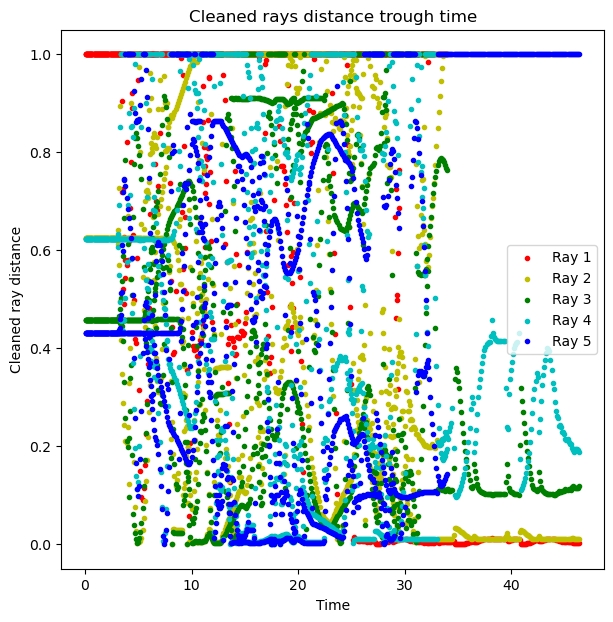

In [76]:
from sklearn.preprocessing import MinMaxScaler

#Ejercicio 3

#Kart y y time son inutiles para el modelo
cleanKartData = kartData.drop(columns=['karty', 'time'])

#Normalizar distancia de obstaculos en cada rayo
scaler = MinMaxScaler()

columnsToNormalize = ['ray1', 'ray2', 'ray3', 'ray4', 'ray5']

for column in columnsToNormalize:
    mask = (kartData[column] != -1)
    cleanKartData.loc[mask, column] = scaler.fit_transform(cleanKartData.loc[mask, [column]])
    
    #Si no hemos chocado con nada, significa que "no hay peligro", es decir, que tenemos la distancia del rayo segura
    invalidMask = (kartData[column] == -1)
    cleanKartData.loc[invalidMask, column] = 1

display(cleanKartData)

#Distancia limpia de los rayos a traves del tiempo
plt.figure(figsize=(7, 7))
plt.scatter(kartData['time'], cleanKartData['ray1'], c='r', marker='.', label="Ray 1")
plt.scatter(kartData['time'], cleanKartData['ray2'], c='y', marker='.', label="Ray 2")
plt.scatter(kartData['time'], cleanKartData['ray3'], c='g', marker='.', label="Ray 3")
plt.scatter(kartData['time'], cleanKartData['ray4'], c='c', marker='.', label="Ray 4")
plt.scatter(kartData['time'], cleanKartData['ray5'], c='b', marker='.', label="Ray 5")
plt.xlabel('Time')
plt.ylabel('Cleaned ray distance')
plt.legend()
plt.title('Cleaned rays distance trough time')
plt.show()

#El modelo que exportamos es los datos de las matrices, hay que programar feedforward en unity